#Projected Gradient Descent

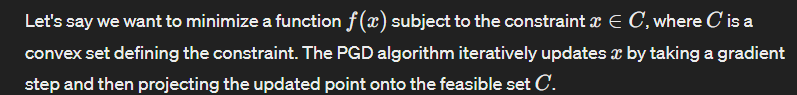

In [ ]:
import numpy as np

def projected_gradient_descent(f, grad_f, project, x0, lr=0.01, num_steps=100):
    """
    Projected Gradient Descent (PGD) for minimizing f(x) subject to the constraint x in C.

    Parameters:
        f (function): Objective function to minimize.
        grad_f (function): Gradient function of f.
        project (function): Projection function onto the feasible set C.
        x0 (numpy array): Initial point.
        lr (float): Learning rate or step size for gradient descent.
        num_steps (int): Number of PGD steps.

    Returns:
        numpy array: The optimized point x.
    """
    x = x0.copy()

    for _ in range(num_steps):
        gradient = grad_f(x)
        x = x - lr * gradient  # Gradient descent step
        x = project(x)         # Projection onto the feasible set C

    return x

# Example usage:
# Define the objective function and its gradient
def quadratic(x):
    return np.sum(x**2)

def grad_quadratic(x):
    return 2 * x

# Define the projection function onto a hypercube [a, b]
def project_hypercube(x, a=-1, b=1):
    return np.maximum(a, np.minimum(b, x))

# Set up parameters
np.random.seed(0)
x0 = np.random.randn(2)  # Initial point
lr = 0.1                 # Learning rate
num_steps = 100          # Number of PGD steps

# Run Projected Gradient Descent
x_opt = projected_gradient_descent(quadratic, grad_quadratic, project_hypercube, x0, lr=lr, num_steps=num_steps)

print("Optimal solution:", x_opt)
print("Optimal value of f(x):", quadratic(x_opt))

Optimal solution: [2.54629497e-10 8.15134630e-11]
Optimal value of f(x): 7.148062540804482e-20


#Projection onto Closed Convex Set

In [ ]:
import numpy as np
from scipy.optimize import minimize

def projection_onto_convex_set(x0, constraints):
    """
    Project a point x0 onto a closed convex set defined by linear inequality constraints.

    Parameters:
        x0 (numpy array): The point to project onto the convex set.
        constraints (list of dict): List of constraint dictionaries, each specifying a linear inequality constraint.
                                     Each dictionary has keys 'type', 'fun', and 'jac'.
                                     'type': Constraint type ('ineq' for inequality).
                                     'fun': Function defining the constraint (returns >= 0 for feasibility).
                                     'jac': Jacobian (gradient) of the constraint function.

    Returns:
        numpy array: The projected point onto the convex set.
    """
    # Define an objective function to minimize (distance from x0)
    def objective(y):
        return np.linalg.norm(y - x0)**2

    # Initialize optimization bounds (unconstrained)
    bounds = [(None, None) for _ in range(len(x0))]

    # Use scipy.optimize.minimize to perform the projection
    result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints)

    # Return the optimized point (projected point)
    return result.x

# Example usage:
if __name__ == "__main__":
    # Define the point x0 and constraints for a convex set (e.g., hypercube)
    x0 = np.array([1.5, 2.0, -1.0])

    # Define linear inequality constraints for a hypercube [a, b]^n (e.g., [-1, 1]^3)
    # Constraints: -1 <= x_i <= 1 for all i
    constraints = [
        {'type': 'ineq', 'fun': lambda x: x[0] - (-1), 'jac': lambda x: np.array([1.0, 0.0, 0.0])},  # x1 >= -1
        {'type': 'ineq', 'fun': lambda x: 1 - x[0], 'jac': lambda x: np.array([-1.0, 0.0, 0.0])},   # x1 <= 1
        {'type': 'ineq', 'fun': lambda x: x[1] - (-1), 'jac': lambda x: np.array([0.0, 1.0, 0.0])},  # x2 >= -1
        {'type': 'ineq', 'fun': lambda x: 1 - x[1], 'jac': lambda x: np.array([0.0, -1.0, 0.0])},   # x2 <= 1
        {'type': 'ineq', 'fun': lambda x: x[2] - (-1), 'jac': lambda x: np.array([0.0, 0.0, 1.0])},  # x3 >= -1
        {'type': 'ineq', 'fun': lambda x: 1 - x[2], 'jac': lambda x: np.array([0.0, 0.0, -1.0])}    # x3 <= 1
    ]

    # Project x0 onto the hypercube [-1, 1]^3
    projected_x = projection_onto_convex_set(x0, constraints)

    print("Original point x0:", x0)
    print("Projected point onto the hypercube [-1, 1]^3:", projected_x)

Original point x0: [ 1.5  2.  -1. ]
Projected point onto the hypercube [-1, 1]^3: [ 1.  1. -1.]


#Projected Gradient Descent

In [ ]:
import numpy as np

def projected_gradient_descent(f, grad_f, project, x0, lr=0.01, num_steps=100, tol=1e-6):
    """
    Projected Gradient Descent (PGD) for minimizing f(x) subject to the constraint x in C.

    Parameters:
        f (function): Objective function to minimize.
        grad_f (function): Gradient function of f.
        project (function): Projection function onto the feasible set C.
        x0 (numpy array): Initial point.
        lr (float): Learning rate or step size for gradient descent.
        num_steps (int): Number of PGD steps.
        tol (float): Tolerance to stop optimization (based on change in x).

    Returns:
        numpy array: The optimized point x.
    """
    x = x0.copy()

    for i in range(num_steps):
        gradient = grad_f(x)
        x_new = x - lr * gradient  # Gradient descent step
        x_new = project(x_new)     # Projection onto the feasible set C

        # Check convergence based on change in x
        if np.linalg.norm(x_new - x) < tol:
            break

        x = x_new

    return x

# Example usage:
if __name__ == "__main__":
    # Define the objective function and its gradient
    def quadratic(x):
        return np.sum(x**2)

    def grad_quadratic(x):
        return 2 * x

    # Define the projection function onto a hypercube [a, b]
    def project_hypercube(x, a=-1, b=1):
        return np.maximum(a, np.minimum(b, x))

    # Set up parameters
    np.random.seed(0)
    x0 = np.random.randn(2)  # Initial point
    lr = 0.1                 # Learning rate
    num_steps = 100          # Number of PGD steps
    tol = 1e-6               # Tolerance for stopping criterion

    # Run Projected Gradient Descent
    x_opt = projected_gradient_descent(quadratic, grad_quadratic, project_hypercube, x0, lr=lr, num_steps=num_steps, tol=tol)

    print("Optimal solution:", x_opt)
    print("Optimal value of f(x):", quadratic(x_opt))

Optimal solution: [4.67680524e-06 1.49716586e-06]
Optimal value of f(x): 2.411401286904067e-11


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Initialize SVM model
svm = SVC(kernel='linear', C=1.0)

# Fit SVM model to the data
svm.fit(X, y)

# Get the learned parameters
w_svm = np.concatenate([svm.coef_.flatten(), [svm.intercept_[0]]])

# Define the hinge loss function for SVM
def hinge_loss(w, X, y, C=1.0):
    margin = y * (np.dot(X, w[:-1]) + w[-1])
    loss = np.maximum(0, 1 - margin)
    return C * np.mean(loss)

# Define the gradient of the hinge loss function for SVM
def grad_hinge_loss(w, X, y, C=1.0):
    margin = y * (np.dot(X, w[:-1]) + w[-1])
    indicator = (margin < 1).astype(int)
    grad = np.zeros_like(w)
    grad[:-1] = -C * np.mean((X.T * y * indicator).T, axis=0)
    grad[-1] = -C * np.mean(y * indicator)
    return grad

# Projected Gradient Descent function for SVM
def projected_gradient_descent_svm(X, y, C=1.0, lr=0.01, num_steps=100):
    w = np.zeros(X.shape[1] + 1)  # Initialize weights (including bias)
    for _ in range(num_steps):
        gradient = grad_hinge_loss(w, X, y, C=C)
        w_new = w - lr * gradient  # Gradient descent step
        # Projection onto the feasible set (L2 ball for SVM)
        norm = np.linalg.norm(w_new[:-1])
        if norm > np.sqrt(C):
            w_new[:-1] = w_new[:-1] * np.sqrt(C) / norm
        w = w_new
    return w

# Run Projected Gradient Descent for SVM
w_svm_pgd = projected_gradient_descent_svm(X, y)

print("Weights learned by SVM:", w_svm)
print("Weights learned by PGD for SVM:", w_svm_pgd)


Weights learned by SVM: [ 2.36795628 -0.72852864  0.08829376]
Weights learned by PGD for SVM: [4.59693294e-01 3.37845861e-04 4.49200000e-01]


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor

# Generate synthetic data
X_boost, y_boost = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Initialize Boosting model
boosting = DecisionTreeRegressor(max_depth=1)

# Fit the first weak learner (initial constant prediction)
boosting.fit(X_boost, y_boost)

# Define the exponential loss function for Boosting
def exponential_loss(y_true, y_pred):
    return np.mean(np.exp(-y_true * y_pred))

# Define the gradient of the exponential loss function for Boosting
def grad_exponential_loss(y_true, y_pred):
    return -y_true * np.exp(-y_true * y_pred)

# Projected Gradient Descent function for Boosting
def projected_gradient_descent_boosting(X, y, lr=0.1, num_steps=100):
    predictions = np.zeros(len(y))  # Initialize predictions (initially zeros)
    for _ in range(num_steps):
        # Compute the gradient of the loss w.r.t. current predictions
        gradient = grad_exponential_loss(y, predictions)
        # Update the predictions using the gradient
        predictions -= lr * gradient
        # Project the predictions onto the feasible set (range of y)
        predictions = np.maximum(-1, np.minimum(1, predictions))
    return predictions

# Run Projected Gradient Descent for Boosting
predictions_boosting_pgd = projected_gradient_descent_boosting(X_boost, y_boost)

# Compute the coefficients based on the final predictions (for demonstration purposes)
# Handle division by zero gracefully
predictions_boosting_pgd = np.clip(predictions_boosting_pgd, -0.999999, 0.999999)
coeffs_boosting_pgd = 0.5 * np.log((1 + predictions_boosting_pgd) / (1 - predictions_boosting_pgd))

print("Coefficients learned by PGD for Boosting:", coeffs_boosting_pgd)

Coefficients learned by PGD for Boosting: [0.         7.25432862 0.         0.         7.25432862 0.
 7.25432862 7.25432862 0.         7.25432862 7.25432862 0.
 0.         7.25432862 7.25432862 0.         7.25432862 0.
 7.25432862 0.         7.25432862 7.25432862 0.         0.
 7.25432862 0.         7.25432862 7.25432862 7.25432862 7.25432862
 0.         0.         0.         0.         7.25432862 7.25432862
 0.         0.         0.         0.         7.25432862 7.25432862
 0.         7.25432862 7.25432862 0.         7.25432862 7.25432862
 7.25432862 7.25432862 0.         7.25432862 7.25432862 7.25432862
 0.         0.         0.         7.25432862 0.         0.
 0.         7.25432862 7.25432862 7.25432862 0.         7.25432862
 0.         0.         0.         7.25432862 7.25432862 0.
 0.         7.25432862 7.25432862 0.         7.25432862 7.25432862
 0.         0.         0.         7.25432862 0.         0.
 7.25432862 7.25432862 7.25432862 7.25432862 0.         0.
 0.         0.   

# Mirror Descent with  Bregman Projections

In [ ]:
import numpy as np

def mirror_descent(f, grad_f, bregman_div, bregman_prox, x0, lr=0.1, num_steps=100):
    """
    Mirror Descent with Bregman Projections for minimizing f(x) subject to constraints defined by a Bregman divergence.

    Parameters:
        f (function): Objective function to minimize.
        grad_f (function): Gradient function of f.
        bregman_div (function): Bregman divergence function.
        bregman_prox (function): Bregman projection function.
        x0 (numpy array): Initial point.
        lr (float): Learning rate or step size for Mirror Descent.
        num_steps (int): Number of Mirror Descent steps.

    Returns:
        numpy array: The optimized point x.
    """
    x = x0.copy()

    for _ in range(num_steps):
        gradient = grad_f(x)
        x_new = x - lr * gradient  # Gradient descent step
        x_new = bregman_prox(x_new)  # Bregman projection onto the feasible set
        x = x_new

    return x

# Example usage:
if __name__ == "__main__":
    # Define the objective function and its gradient
    def quadratic(x):
        return np.sum(x**2)

    def grad_quadratic(x):
        return 2 * x

    # Define the Bregman divergence (squared Euclidean distance)
    def squared_euclidean_divergence(x, y):
        return np.sum((x - y)**2)

    # Define the Bregman projection onto the Euclidean ball (L2 norm ball)
    def euclidean_projection(x, center=np.zeros(2), radius=1.0):
        direction = x - center
        norm = np.linalg.norm(direction)
        if norm > radius:
            return center + (radius / norm) * direction
        else:
            return x

    # Set up parameters
    np.random.seed(0)
    x0 = np.random.randn(2)  # Initial point
    lr = 0.1                 # Learning rate
    num_steps = 100          # Number of Mirror Descent steps

    # Run Mirror Descent with Bregman Projections
    x_opt = mirror_descent(quadratic, grad_quadratic, squared_euclidean_divergence, euclidean_projection, x0, lr=lr, num_steps=num_steps)

    print("Optimal solution:", x_opt)
    print("Optimal value of f(x):", quadratic(x_opt))

Optimal solution: [2.48320803e-10 5.63290309e-11]
Optimal value of f(x): 6.483618076376559e-20
